In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = sns.load_dataset("iris")

In [3]:
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data['species']=data['species'].map({ "setosa": 0 , "versicolor": 1 , "virginica": 2 })  #simpler method
#alternate method we can use for preprocessing 
# from sklearn.preprocessing import LabelEncoder
# le=LaberlEncoder()
# data['species']=le.fit_transform(data['species'])

In [5]:
data


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
x=data.iloc[:,:-1]  #excludes the last value in the column which is the output column 
y=data.iloc[:,-1]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=69)

In [10]:
from sklearn.tree import DecisionTreeClassifier
#for confusion matrix we use accuracy,recall,f1_score,epsio

In [11]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
para={
    "criterion":['gini','entropy','log_loss'],
    "splitter":["best","random"],
    "max_depth":[1,2,3,4,5,6]
}

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
gd_model=GridSearchCV(model,param_grid=para,cv=3,scoring="accuracy")

In [15]:
gd_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [16]:
gd_model.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}

In [17]:
y_pred=gd_model.predict(x_test)


In [18]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.67      0.80        12
           2       0.81      1.00      0.89        17

    accuracy                           0.91        45
   macro avg       0.94      0.89      0.90        45
weighted avg       0.93      0.91      0.91        45



In [20]:
print(accuracy_score(y_test,y_pred))

0.9111111111111111


In [1]:
from sklearn.linear_model import LogisticRegression 

In [22]:
logi_model=LogisticRegression()

In [23]:
import warnings 
warnings.filterwarnings("ignore") #used because logi_model uses more iterations hence to avvoid the errors 

In [24]:
logi_model.fit(x_train,y_train)

LogisticRegression()

In [25]:
y1_pred=logi_model.predict(x_test)

In [26]:
x1_pred=logi_model.predict(x_train)

In [27]:
print("Logistic Regression Training accuracy is:",accuracy_score(y_test,y1_pred))

Logistic Regression Training accuracy is: 0.9777777777777777


In [28]:
print("Logistic Regression Testing Accuracy is:", accuracy_score(y_train,x1_pred))

Logistic Regression Testing Accuracy is: 0.9619047619047619


### KNN (k-nearest neighbors) uses the euclidean formula underoot (x2-x1)^2+(y2-y1)^2
it's a lazy approach since in training it just stores the data and for testing it does all the work of calculating the distance of all the points form the given value
here k will be the no. of points with which it is compaared for least distance 
graph will be used where distance is plotted on y axis and values on x axis then a graph which looks like a smooth L is formed where the elbow of L decides the K 
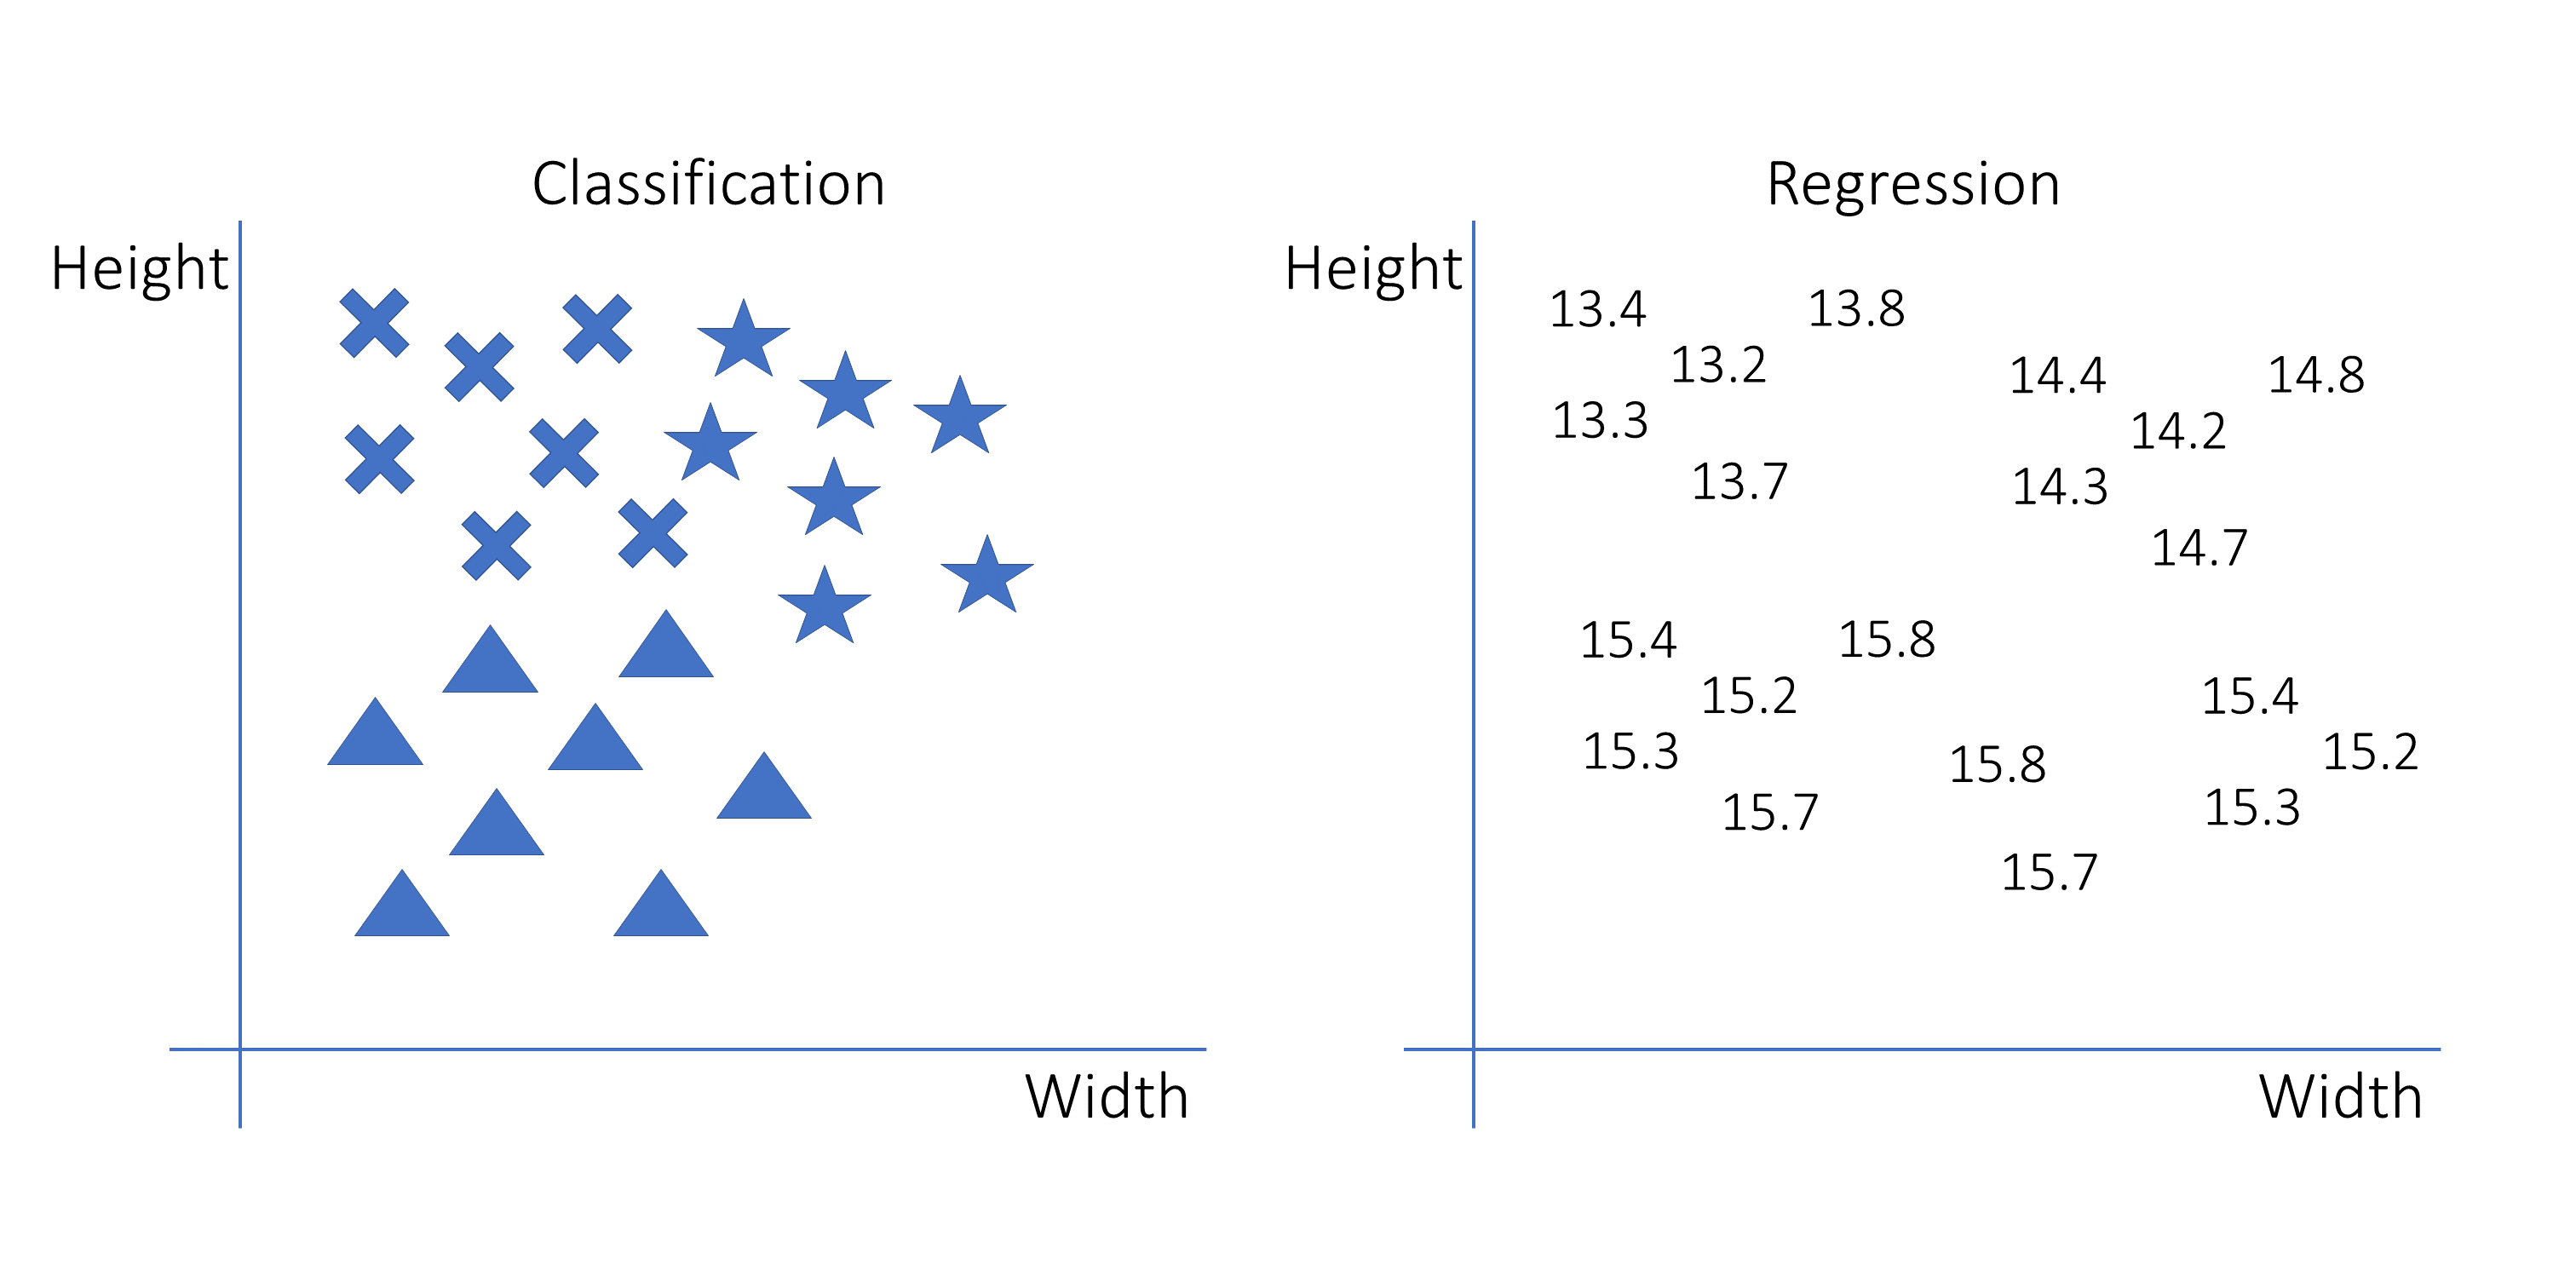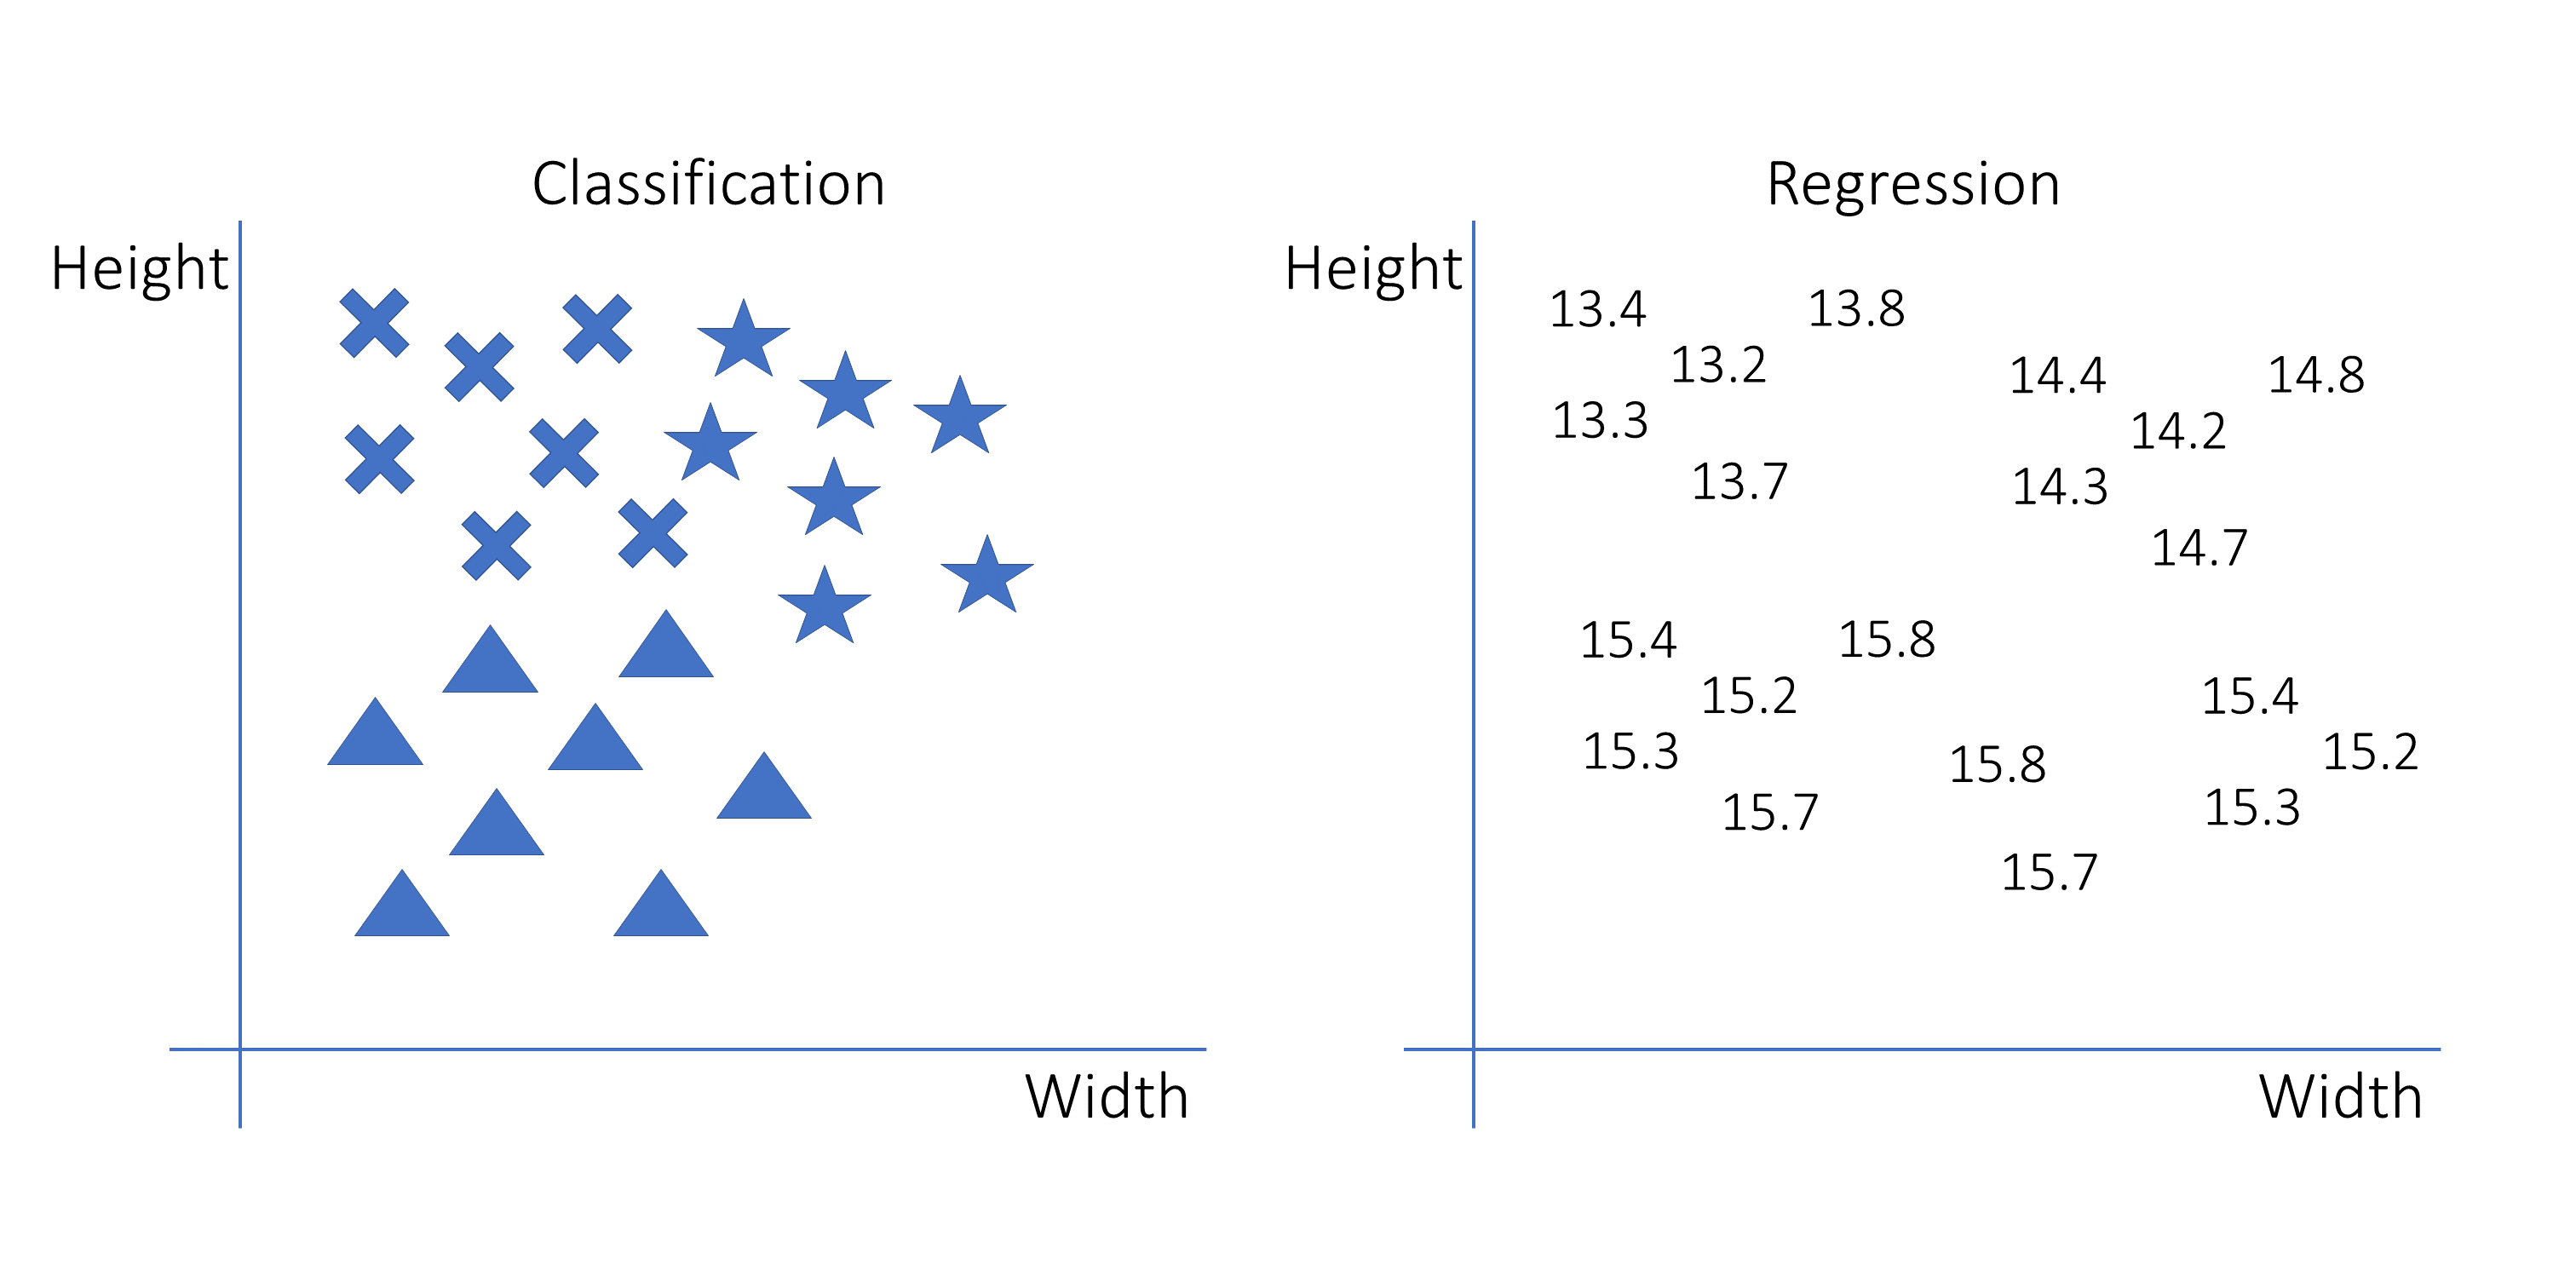



### SVM (support vector machine) uses planes to classify data
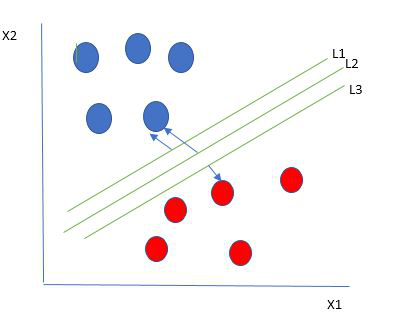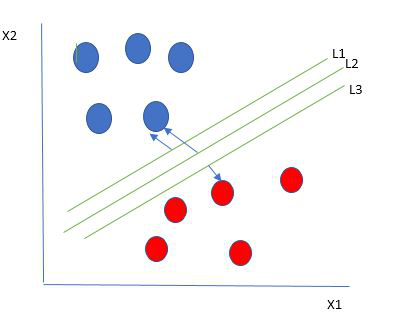



In [29]:
from sklearn.neighbors import KNeighborsClassifier # for knn algo 

In [30]:
knn=KNeighborsClassifier(n_neighbors=5)

In [31]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=knn.predict(x_test)
x_pred=knn.predict(x_train)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [41]:
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


In [42]:
print(ac)

0.9777777777777777


### KNN Algo (using for loop)


In [43]:
dis=[]

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
for i in range(1,11):
    kn1=KNeighborsClassifier(n_neighbors=i)
    mode=cross_val_score(kn1,x_train,y_train,cv=5)
    dis.append(mode.mean())

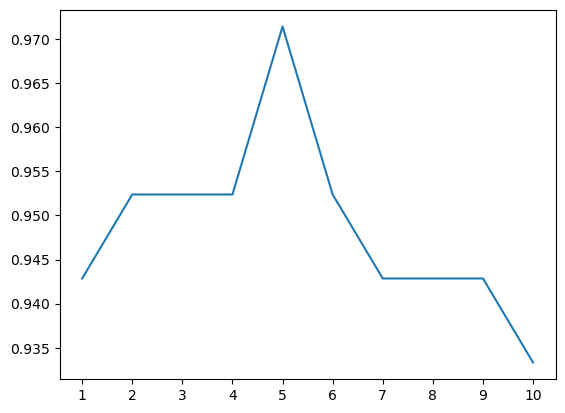

In [46]:
# this is for accuraacy
plt.plot(range(1,11),dis)
plt.xticks(range(1,11))   
plt.show()